# Code for geometry files

### Importing the geometry file

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import skimage.morphology as mor
from skimage import measure
import copy



## What I want to do

Import numpy
Import scypy 

Load inn array
Pick ij coordinate at radom (1,1022)
Image coordinate (i,j)
See if the coordinates are the same
If not the same load the coordinates into a text file


# Here we are differentiating between tripple junctions and gbs

In [2]:
img = np.loadtxt('1024x256_N128_no_header.geom')
up = np.roll(img,1, axis = 0)
down = np.roll(img,-1, axis = 0)
right = np.roll(img,1, axis = 1)
left = np.roll(img,-1, axis = 1)

# Make a 3d array and swap the axes to make it easier to manage
a_3d_array = np.array([img,up,down,right,left]).swapaxes(0,2).swapaxes(0,1)

# Make an empty array of the same size as img
unique_points = np.zeros(np.shape(img))

# Go though the (1024, 1024) part of the array, and find the number of unique numbers across the 5 maps
for yidx, y_vals in enumerate(a_3d_array):
    for xidx, val in enumerate(y_vals):
        if len(np.unique(val)) > 1:
            unique_points[yidx][xidx] = len(np.unique(val))
        if len(np.unique(val)) == 1:
            unique_points[yidx][xidx] = -1
 

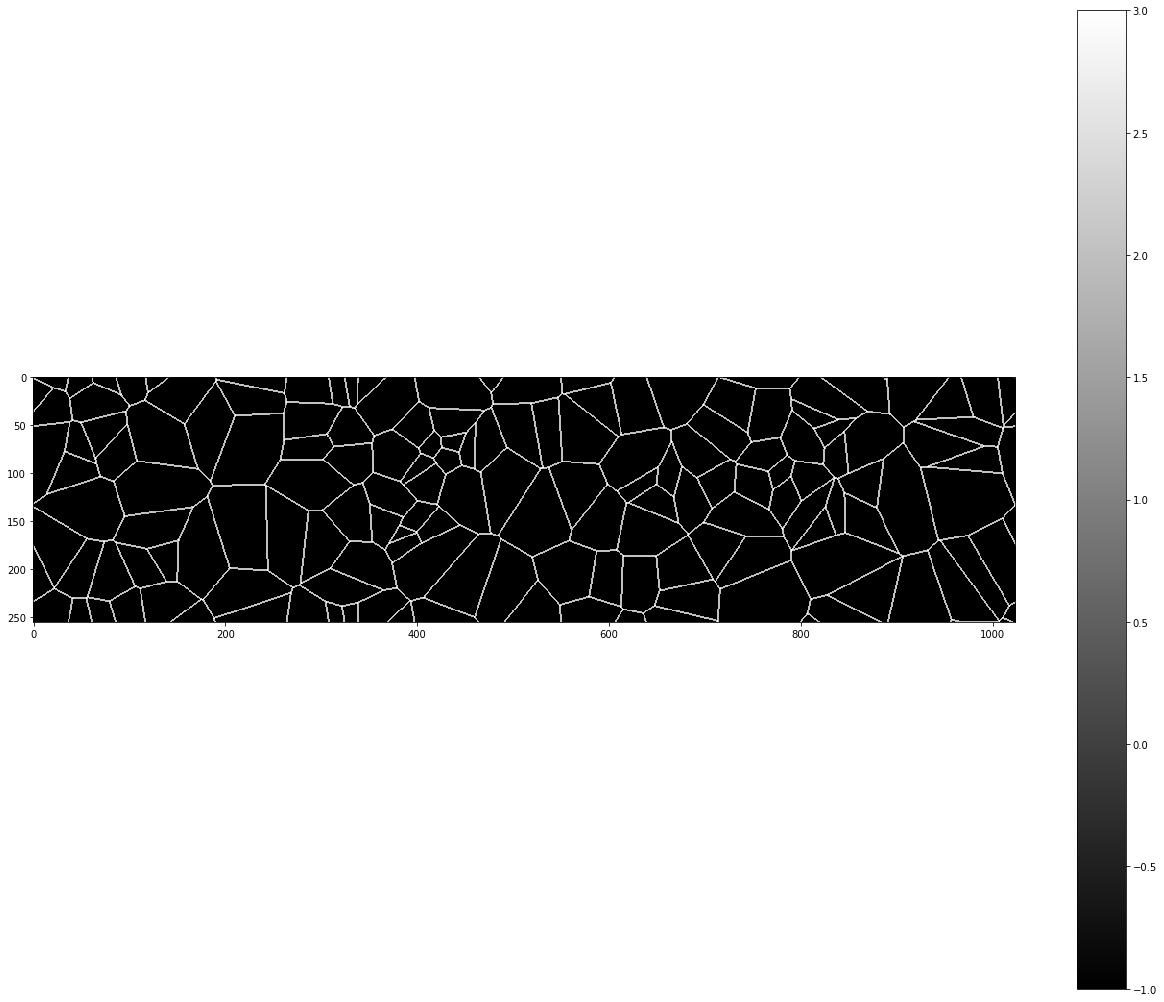

In [3]:
plt.figure(figsize=(22,18))
plt.imshow(img, cmap='viridis')
plt.imshow(unique_points, cmap='gray', vmax=3)

plt.colorbar()

# ORIGINAL MAP IS IN COLOURS
# BOUNDARIES IN BLACK
# TRIPLE POINTS IN WHITE

# Here I am making suub_grains in my microstructure

[[  1   1   1 ...  27  27  27]
 [  1   1   1 ...  26  26  27]
 [ 29   1   1 ...  26  26  26]
 ...
 [144 144 144 ... 155 155 155]
 [144 144 144 ... 155 155 155]
 [144 144 144 ... 155 155 155]]
Grain ID: 0 has area 355 and 5 random coords will be generated
Grain ID: 1 has area 430 and 5 random coords will be generated
Grain ID: 2 has area 339 and 5 random coords will be generated
Grain ID: 3 has area 772 and 5 random coords will be generated
Grain ID: 4 has area 230 and 5 random coords will be generated
Grain ID: 5 has area 2181 and 5 random coords will be generated
Grain ID: 6 has area 790 and 5 random coords will be generated
Grain ID: 7 has area 1305 and 5 random coords will be generated
Grain ID: 8 has area 525 and 5 random coords will be generated
Grain ID: 9 has area 354 and 5 random coords will be generated
Grain ID: 10 has area 452 and 5 random coords will be generated
Grain ID: 11 has area 2605 and 5 random coords will be generated
Grain ID: 12 has area 2495 and 5 random coords 

Grain ID: 125 has area 885 and 5 random coords will be generated
Grain ID: 126 has area 3099 and 5 random coords will be generated
Grain ID: 127 has area 2732 and 5 random coords will be generated
Grain ID: 128 has area 2237 and 5 random coords will be generated
Grain ID: 129 has area 1335 and 5 random coords will be generated
Grain ID: 130 has area 662 and 5 random coords will be generated
Grain ID: 131 has area 1653 and 5 random coords will be generated
Grain ID: 132 has area 3322 and 5 random coords will be generated
Grain ID: 133 has area 2082 and 5 random coords will be generated
Grain ID: 134 has area 2509 and 5 random coords will be generated
Grain ID: 135 has area 4488 and 5 random coords will be generated
Grain ID: 136 has area 2852 and 5 random coords will be generated
Grain ID: 137 has area 1847 and 5 random coords will be generated
Grain ID: 138 has area 1933 and 5 random coords will be generated
Grain ID: 139 has area 1475 and 5 random coords will be generated
Grain ID: 14

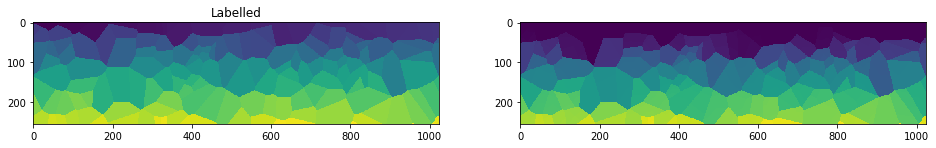

In [10]:
# Find the grains
all_labels = measure.label(img)
max_val = np.max(all_labels)

new_map = copy.deepcopy(all_labels)

# Get grain properties
properties = measure.regionprops(all_labels)
area_list = [prop.area for prop in properties]
coord_list = [prop.coords for prop in properties]

# Plot the data
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(16,14))
#ax1.imshow(img, cmap='gray')
#ax1.set_title('original')
ax2.imshow(all_labels, cmap='viridis')
ax2.set_title('Labelled')

# Find all grains which are above a certain area
for idx, (area, coords) in enumerate(zip(area_list, coord_list)):
    max_phase = np.max(new_map)
    if area < 35000:
        numrand = int(5)


        print('Grain ID: {0} has area {1} and {2} random coords will be generated'.format(idx, area, numrand))
        
        # Find random numbers and get coords     NOTE: THEY ARE (Y,X)!!
        random_ids = np.random.choice(len(coords), numrand)
        random_coords = [coords[index] for index in [0, int(len(coords)/4)-1, int(2*len(coords)/4)-1, int(3*len(coords)/4)-1, int(len(coords))-1]]
        
        # Plot the random points
        #ax2.scatter(random_coords.transpose()[1], random_coords.transpose()[0])
        
       
        
        
        # For each coordinate in a grain
        for coord in coords:
            dist=[]
            # Find distance to each random point
            for random_coord in random_coords:
                dist.append(np.sqrt((random_coord[1]-coord[1])**2+(random_coord[0]-coord[0])**2))

            # Reassign grain ID
            new_map[coord[0]][coord[1]] = numrand*idx + np.argmin(dist)
                
new_map = new_map +1

ax3.imshow(new_map, vmin=max_val)


np.savetxt('no_rxa_grains_sub_grains.geom',new_map,fmt='%d')
            




In [5]:
print(np.amax(new_map))

805


# Here I want to add the RXA points to the microstrucutre

[[  0   0   0 ... 156 156 156]
 [  0   0   0 ... 156 156 156]
 [  0   0   0 ... 156 156 156]
 ...
 [744 744 744 ... 838 838 838]
 [744 744 744 ... 838 838 838]
 [744 744 744 ... 839 839 839]]


5276
